In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
#import math
#import random

# 2.1

### Import Data

In [11]:
data_2_1 =  pd.read_csv(r'hw3Data/D2z.txt', sep=' ', names=["x1","x2","y"])

### Create Grid

In [12]:
x1 = np.arange(-2, 2.1, 0.1)
x2 = np.arange(-2, 2.1, 0.1)
x1 = np.around(x1, decimals=1)
x2 = np.around(x2, decimals=1)

### Create Function for 1NN

In [19]:
def nn1(point_array,train_data):
    distance_min = None
    prediction_final = None
    point_test = np.array(point_array)
    for index, row in train_data.iterrows():
        point_train = np.array(row)[:-1]
        distance = np.linalg.norm(point_test - point_train, 2) 
        prediction = train_data.loc[index,"y"]
        if distance_min == None:
            distance_min = distance
            prediction_final = prediction
        else:
            if distance_min > distance:
                distance_min = distance
                prediction_final = prediction
    return prediction_final

### Plot Grid

Text(0.5, 1.0, '2D Scatter Plot')

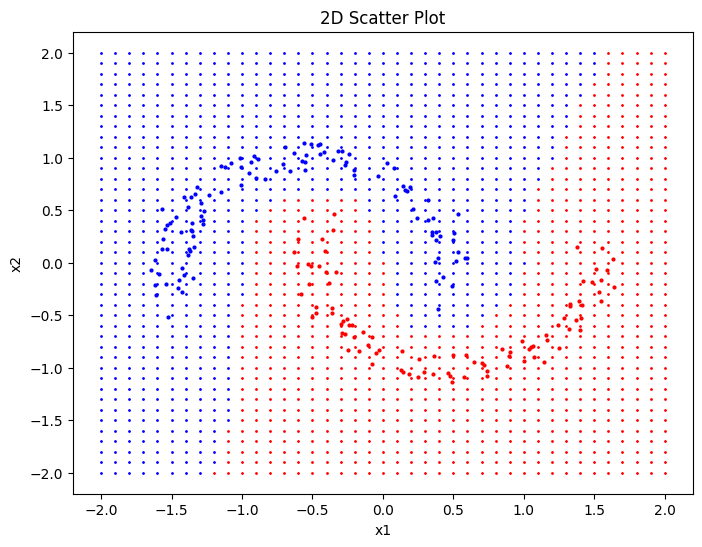

In [29]:
plt.figure(figsize=(8, 6))
# Calculate 1NN for the grid
for i in x1:
    for j in x2:
        prediction = nn1([i,j],data_2_1)
        if prediction == 1:
            color = "blue"
        else:
            color = "red"
        plt.scatter(i, j, color=color, s=1)
# Plot train data
for index, row in data_2_1.iterrows():
    i = row["x1"]
    j = row["x2"]
    prediction = row["y"]
    if prediction == 1:
        color = "blue"
    else:
        color = "red"
    plt.scatter(i, j, color=color, s=4)

plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig("2_1.png")
plt.title('2D Scatter Plot')

# 2.2

### Import Data

In [3]:
data_2_2 = pd.read_csv(r'hw3Data/emails.csv')

### Create Train and Test Set

In [4]:
train_single = data_2_2.loc[1:4000].reset_index(drop=True)
test_single = data_2_2.loc[4001:5000].reset_index(drop=True)

In [5]:
fold_ranges = [(0, 999), (1000, 1999), (2000, 2999), (3000, 3999), (4000, 4999)]
fold = {}
for i, (start_idx, end_idx) in enumerate(fold_ranges):
    test_set = data_2_2.loc[start_idx:end_idx]
    list_email = list(test_set["Email No."])
    train_set = data_2_2[~data_2_2['Email No.'].isin(list_email)]
    fold[i+1] = (train_set,test_set)

### Create functions for accuracy, precision, and recall

In [6]:
def metrics(predicted_list, truth_list):
    TP = 0 
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(predicted_list)):
        predicted = predicted_list[i]
        truth = truth_list[i]
        if truth == 1:
            if predicted == 1:
                TP +=1
            else:
                FN +=1
        else:
            if predicted == 1:
                FP +=1
            else:
                TN +=1       
    accuracy = (TP + TN)/(TP+FP+FN+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    return accuracy, precision, recall 

### Create Function for 1NN

In [7]:
def nn1(point_array,train_data):
    distance_min = None
    prediction_final = None
    point_test = np.array(point_array)
    for index, row in train_data.iterrows():
        point_train = np.array(row)[:-1]
        distance = np.linalg.norm(point_test - point_train, 2) 
        prediction = train_data.loc[index,"Prediction"]
        if distance_min == None:
            distance_min = distance
            prediction_final = prediction
        else:
            if distance_min > distance:
                distance_min = distance
                prediction_final = prediction
    return prediction_final

### Implement 1NN 5-fold Cross Validation

In [73]:
result_2_2 = {}
for f in fold:
    train = copy.copy(fold[f][0])
    test = copy.copy(fold[f][1])
    columns_to_drop = ['Email No.']
    train = train.drop(columns=columns_to_drop)
    test = test.drop(columns=columns_to_drop)
    for i, row in test.iterrows():
        point_array = np.array(row)[:-1]
        test.loc[i,"y_predicted"] = Knn(point_array,train)
        print(i)
    predicted_list = list(test["y_predicted"])
    truth_list = list(test["Prediction"])  
    accuracy, precision, recall = metrics(predicted_list, truth_list)
    result_2_2[f] = (accuracy, precision, recall) 
    print(accuracy, precision, recall)   

0
1
2
3
4
5
6
7
8
9


KeyboardInterrupt: 

In [54]:
result_2_2

{1: (0.825, 0.6544943820224719, 0.8175438596491228),
 2: (0.853, 0.6857142857142857, 0.8664259927797834),
 3: (0.862, 0.7212121212121212, 0.8380281690140845),
 4: (0.851, 0.7164179104477612, 0.8163265306122449),
 5: (0.775, 0.6057441253263708, 0.7581699346405228)}

# 2.3

### Create Function for Logistic Regression

In [35]:
def logistic(learning_rate,train):
    columns_to_drop = ["Prediction"]
    y = np.array(train["Prediction"])
    x = np.array(train.drop(columns=columns_to_drop))
    theta = np.zeros((x.shape[1],))
    m = x.shape[0]
    print(m,x.shape,y.shape,theta.shape)
    loss_values = []
    for r in range(10000):
        if r%1000 == 0:
            print(r)
        dot_product = np.dot(x, theta)
        sigmoid = 1 / (1 + np.exp(-dot_product))
        loss = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
        loss_values.append(loss)
        grad_loss = np.dot((sigmoid - y), x)/m  
        new_theta = theta - learning_rate * grad_loss
        
        theta = new_theta
    return theta, loss_values

### Run 5-Fold Logistic Regression

In [ ]:
learning_rate = 0.1
result_2_3 = {}
for f in fold:
    train = copy.copy(fold[f][0])
    test = copy.copy(fold[f][1])
    columns_to_drop = ['Email No.']
    train = train.drop(columns=columns_to_drop)
    test = test.drop(columns=columns_to_drop)
    train['Bias_collumn'] = 1
    test['Bias_collumn'] = 1
    optimal_theta, list_loss = logistic(learning_rate,train)

    truth_list = list(test["Prediction"])  
    columns_to_drop = ["Prediction"]
    x_test = np.array(test.drop(columns=columns_to_drop))
    
    prediction = 1 / (1 + np.exp(-np.dot(x_test, optimal_theta)))
    test['Result'] = prediction
    for i, row in test.iterrows():
        if row['Result']> 0.5:
            row['Result'] = 1
        else:
            row['Result'] = 0

    predicted_list = list(test["Result"])
    accuracy, precision, recall = metrics(predicted_list, truth_list)
    print(accuracy, precision, recall)
    result_2_3[f] = (accuracy, precision, recall)

# 2.4

### Create Function for general KNN

In [8]:
def Knn(point_array, train_data, k=1):
    distances = []  
    point_test = np.array(point_array)
    for index, row in train_data.iterrows():
        point_train = np.array(row)[:-1]
        distance = np.linalg.norm(point_test - point_train, 2) 
        prediction = train_data.loc[index, "Prediction"]
        distances.append((distance, prediction))  
        
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    predictions = []
    for _, prediction in nearest_neighbors:
        predictions.append(prediction)
    if sum(predictions) > k/2:
        prediction_final = 1
    else:
        prediction_final = 0
    return prediction_final

### Implement kNN 5-fold Cross Validation

In [9]:
result_2_4 = {}
for f in fold:
    result_2_4[f] = {}
    for k in [1,3,5,7,10]:
        train = copy.copy(fold[f][0])
        test = copy.copy(fold[f][1])
        columns_to_drop = ['Email No.']
        train = train.drop(columns=columns_to_drop)
        test = test.drop(columns=columns_to_drop)
        for i, row in test.iterrows():
            point_array = np.array(row)[:-1]
            test.loc[i,"y_predicted"] = Knn(point_array,train,k)
            print(i)
        predicted_list = list(test["y_predicted"])
        truth_list = list(test["Prediction"])  
        accuracy, precision, recall = metrics(predicted_list, truth_list)
        result_2_4[f][k] = (accuracy, precision, recall) 
        print(accuracy, precision, recall)   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
result_2_4

{1: {1: (0.825, 0.6544943820224719, 0.8175438596491228),
  3: (0.847, 0.680327868852459, 0.8736842105263158),
  5: (0.838, 0.6694214876033058, 0.8526315789473684),
  7: (0.838, 0.6694214876033058, 0.8526315789473684),
  10: (0.862, 0.7333333333333333, 0.8105263157894737)},
 2: {1: (0.853, 0.6857142857142857, 0.8664259927797834),
  3: (0.851, 0.6975308641975309, 0.8158844765342961),
  5: (0.85, 0.7068403908794788, 0.7833935018050542),
  7: (0.862, 0.7220447284345048, 0.8158844765342961),
  10: (0.87, 0.7525773195876289, 0.7906137184115524)},
 3: {1: (0.862, 0.7212121212121212, 0.8380281690140845),
  3: (0.86, 0.725, 0.8169014084507042),
  5: (0.873, 0.752411575562701, 0.823943661971831),
  7: (0.875, 0.7539936102236422, 0.8309859154929577),
  10: (0.876, 0.7816901408450704, 0.7816901408450704)},
 4: {1: (0.851, 0.7164179104477612, 0.8163265306122449),
  3: (0.88, 0.7788461538461539, 0.826530612244898),
  5: (0.869, 0.7603833865814696, 0.8095238095238095),
  7: (0.874, 0.7781456953642384

In [11]:
average = {}
for k in [1,3,5,7,10]:
    average[k] = 0 
    for f in result_2_4:
        average[k] += result_2_4[f][k][0]
    average[k] = average[k]/5

In [18]:
average

{1: 0.8332,
 3: 0.8423999999999999,
 5: 0.8417999999999999,
 7: 0.8454,
 10: 0.8552}

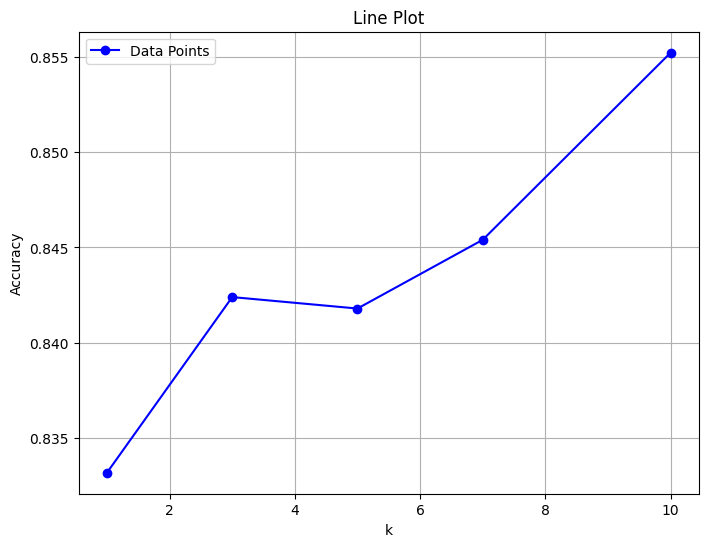

In [38]:
x = list(average.keys())
y = list(average.values())

# Creating the line plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', color='b', label='Data Points')
plt.title('Line Plot')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("2_4.png")
plt.show()

# 2.5 

### Modify KNN fuction to return metrics for the different thresholds 

In [22]:
def Knn_t(point_array, train_data, k=5,t=0):
    distances = []  
    point_test = np.array(point_array)
    for index, row in train_data.iterrows():
        point_train = np.array(row)[:-1]
        distance = np.linalg.norm(point_test - point_train, 2) 
        prediction = train_data.loc[index, "Prediction"]
        distances.append((distance, prediction))  
        
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    predictions = []
    for _, prediction in nearest_neighbors:
        predictions.append(prediction)
        
    if sum(predictions) >= t:
        prediction_final = 1
    else:
        prediction_final = 0
    return prediction_final

### Add False Positive Rate to Metrics Function

In [23]:
def metrics_v2(predicted_list, truth_list):
    TP = 0 
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(predicted_list)):
        predicted = predicted_list[i]
        truth = truth_list[i]
        if truth == 1:
            if predicted == 1:
                TP +=1
            else:
                FN +=1
        else:
            if predicted == 1:
                FP +=1
            else:
                TN +=1       
    accuracy = (TP + TN)/(TP+FP+FN+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    false_positive_rate = (FP)/(TN + FP)
    return accuracy, precision, recall, false_positive_rate

### Implement ROC curve for 5NN

In [29]:
result_2_5_a = {}
for t in [0,1,2,3,4,5]:
    train = copy.copy(train_single)
    test = copy.copy(test_single)
    columns_to_drop = ['Email No.']
    train = train.drop(columns=columns_to_drop)
    test = test.drop(columns=columns_to_drop)
    for i, row in test.iterrows():
        point_array = np.array(row)[:-1]
        test.loc[i,"y_predicted"] = Knn_t(point_array,train,5,t)
        print(i)
    predicted_list = list(test["y_predicted"])
    truth_list = list(test["Prediction"])  
    accuracy, precision, recall, false_positive_rate = metrics_v2(predicted_list, truth_list)
    result_2_5_a[t] = (false_positive_rate, recall)  
result_2_5_a[6] = (0,0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ZeroDivisionError: division by zero

In [32]:
result_2_5_a

{0: (1.0, 1.0),
 1: (0.5072046109510087, 0.9606557377049181),
 2: (0.33429394812680113, 0.8852459016393442),
 3: (0.207492795389049, 0.7475409836065574),
 4: (0.10806916426512968, 0.5704918032786885),
 5: (0.056195965417867436, 0.35737704918032787),
 6: (0, 0)}

### Implement Logistic Regression

In [39]:
learning_rate = 0.1
result_2_5_b = {}
train = copy.copy(train_single)
test = copy.copy(test_single)
columns_to_drop = ['Email No.']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)
train['Bias_collumn'] = 1
test['Bias_collumn'] = 1
optimal_theta, list_loss = logistic(learning_rate,train)

truth_list = list(test["Prediction"])  
columns_to_drop = ["Prediction"]
x_test = np.array(test.drop(columns=columns_to_drop))
    
prediction = 1 / (1 + np.exp(-np.dot(x_test, optimal_theta)))
test['Result'] = prediction
print(test['Result'])
for tn in range(1000):
    t = tn/10000
    test_2 = copy.copy(test)
    for i, row in test_2.iterrows():
        if row['Result']> t:
            row['Result'] = 1
        else:
            row['Result'] = 0
    predicted_list = list(test_2["Result"])
    accuracy, precision, recall, false_positive_rate = metrics_v2(predicted_list, truth_list)
    result_2_5_b[t] = (recall, false_positive_rate)

4000 (4000, 3001) (4000,) (3001,)
0


C:\Users\clandriola\AppData\Local\Temp\ipykernel_20420\522535972.py:13: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-dot_product))
C:\Users\clandriola\AppData\Local\Temp\ipykernel_20420\522535972.py:14: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
C:\Users\clandriola\AppData\Local\Temp\ipykernel_20420\522535972.py:14: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))


1000
2000
3000
4000
5000
6000
7000
8000
9000


C:\Users\clandriola\AppData\Local\Temp\ipykernel_20420\3639076164.py:16: RuntimeWarning: overflow encountered in exp
  prediction = 1 / (1 + np.exp(-np.dot(x_test, optimal_theta)))


0       1.032258e-12
1       8.163412e-93
2       1.000000e+00
3       2.685583e-21
4       8.163412e-93
           ...      
994    8.619079e-208
995     8.464911e-10
996     7.534592e-22
997    1.260894e-118
998    3.596048e-155
Name: Result, Length: 999, dtype: float64


In [40]:
result_2_5_b

{0.0: (0.7081967213114754, 0.011527377521613832),
 0.0001: (0.7081967213114754, 0.011527377521613832),
 0.0002: (0.7081967213114754, 0.011527377521613832),
 0.0003: (0.7081967213114754, 0.011527377521613832),
 0.0004: (0.7081967213114754, 0.011527377521613832),
 0.0005: (0.7081967213114754, 0.011527377521613832),
 0.0006: (0.7081967213114754, 0.011527377521613832),
 0.0007: (0.7081967213114754, 0.011527377521613832),
 0.0008: (0.7081967213114754, 0.011527377521613832),
 0.0009: (0.7081967213114754, 0.011527377521613832),
 0.001: (0.7081967213114754, 0.011527377521613832),
 0.0011: (0.7081967213114754, 0.011527377521613832),
 0.0012: (0.7081967213114754, 0.011527377521613832),
 0.0013: (0.7081967213114754, 0.011527377521613832),
 0.0014: (0.7081967213114754, 0.011527377521613832),
 0.0015: (0.7081967213114754, 0.011527377521613832),
 0.0016: (0.7081967213114754, 0.011527377521613832),
 0.0017: (0.7081967213114754, 0.011527377521613832),
 0.0018: (0.7081967213114754, 0.011527377521613832

### Plot ROC

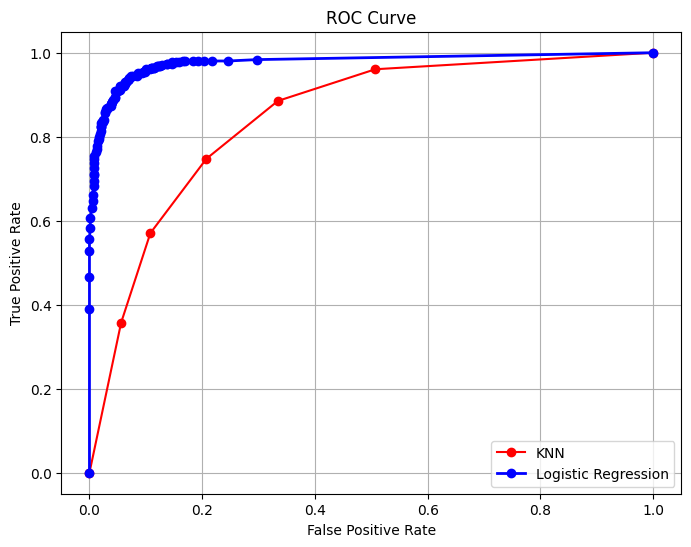

In [46]:
# KNN
plt.figure(figsize=(8, 6))
x_values = [point[0] for point in result_2_5_a.values()]
y_values = [point[1] for point in result_2_5_a.values()]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='r', label='KNN')

true_positive_rates = [result_2_5_b[i]['True Positive Rate'] for i in result_2_5_b]
false_positive_rates = [result_2_5_b[i]['False Positive Rate'] for i in result_2_5_b]
plt.plot(false_positive_rates, true_positive_rates, marker='o', color='b', linestyle='-', linewidth=2, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.savefig("2_5.png")
plt.show()